In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nbaplayersdraft.csv")
df.head(10)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7
5,6,1989,6,6,CHI,Stacey King,Oklahoma,8.0,438.0,7406.0,...,0.235,0.707,16.9,6.4,3.3,0.9,10.9,0.071,-3.4,-2.7
6,7,1989,7,7,IND,George McCloud,Florida State,12.0,766.0,17429.0,...,0.358,0.810,22.8,9.0,3.1,2.3,24.6,0.068,-0.8,5.3
7,8,1989,8,8,DAL,Randy White,Louisiana Tech,5.0,281.0,5382.0,...,0.193,0.707,19.2,7.4,4.9,0.6,1.9,0.017,-5.0,-4.0
8,9,1989,9,9,WSB,Tom Hammonds,Georgia Tech,12.0,687.0,10419.0,...,0.000,0.691,15.2,5.3,3.3,0.6,14.7,0.068,-3.8,-4.7
9,10,1989,10,10,MIN,Pooh Richardson,UCLA,10.0,639.0,19399.0,...,0.329,0.652,30.4,11.1,2.8,6.5,26.7,0.066,0.2,10.5


In [3]:
# cleaning and organizing team names 
df['team'] = df["team"].replace("CHA", "CHO")
df['team'] = df["team"].replace("CHH", "CHO")
df['team'] = df["team"].replace("NJN", "BRK")
df['team'] = df["team"].replace("NOH", "NOP")
df['team'] = df["team"].replace("NOK", "NOP")
df['team'] = df["team"].replace("SEA", "OKC")
df['team'] = df["team"].replace("VAN", "MEM")
df['team'] = df["team"].replace("WSB", "WAS")

print(df['team'].sort_values(ascending = True).unique())

# df.to_csv("finaldata.csv", index = False)

['ATL' 'BOS' 'BRK' 'CHI' 'CHO' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU' 'IND'
 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NOP' 'NYK' 'OKC' 'ORL' 'PHI' 'PHO'
 'POR' 'SAC' 'SAS' 'TOR' 'UTA' 'WAS']


In [4]:
## Part 1) 1a
# filter for players from Duke and drafted in or before 2000
duke_2000 = df[(df["college"] == "Duke") & (df["year"] <= 2000)]

# group by team
team_duke_2000 = duke_2000.groupby("team").size().reset_index(name = "count")
team_duke_2000.sort_values("count", ascending = False)

,team,count
3,DAL,2
8,MIN,2
10,PHO,2
0,ATL,1
1,CHI,1
2,CLE,1
4,DET,1
5,HOU,1
6,IND,1
7,LAC,1


In [5]:
## Part 1) 1b
# filter for players with first_name starts with D, drafted in even year
fnameD_evenYear = df[(df["player"].str.startswith("D")) & (df["year"] % 2 == 0)]
fnameD_evenYear

# group by team
team_fnameD_evenYear = fnameD_evenYear.groupby("team").size().reset_index(name = "count")
team_fnameD_evenYear.sort_values("count", ascending = False)

,team,count
20,OKC,8
1,BOS,7
16,MIL,7
0,ATL,6
26,SAS,5
21,ORL,5
15,MIA,5
7,DEN,4
13,LAL,4
3,CHI,4


In [6]:
## Part 1) B
# relationship between team 1st round pick and subsequent year 1st round pick

# draft data with only 1st round picks
df_draft = df[["year", "overall_pick", "team"]].copy()
df_draft = df_draft[df_draft["overall_pick"] <= 30]
df_draft

,year,overall_pick,team
0,1989,1,SAC
1,1989,2,LAC
2,1989,3,SAS
3,1989,4,MIA
4,1989,5,CHO
...,...,...,...
1887,2021,26,DEN
1888,2021,27,BRK
1889,2021,28,PHI
1890,2021,29,PHO


In [7]:
# transpose into matrix. For years where teams have 1+ pick, select highest pick in draft
draft_matrix = df_draft.pivot_table(index='team', columns='year', values='overall_pick', aggfunc='min')
draft_matrix

year,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
team,,,,,,,,,,,,,,,,,,,,,
ATL,23.0,10.0,9.0,10.0,15.0,NaN,16.0,28.0,22.0,20.0,...,23.0,17.0,15.0,15.0,21.0,19.0,3.0,8.0,6.0,20.0
BOS,13.0,19.0,24.0,21.0,19.0,9.0,14.0,6.0,3.0,10.0,...,21.0,16.0,6.0,16.0,3.0,3.0,27.0,14.0,14.0,NaN
BRK,12.0,1.0,2.0,29.0,16.0,14.0,9.0,8.0,7.0,NaN,...,NaN,22.0,NaN,29.0,NaN,22.0,29.0,17.0,19.0,27.0
CHI,6.0,29.0,26.0,27.0,25.0,21.0,20.0,29.0,28.0,28.0,...,29.0,20.0,16.0,22.0,14.0,16.0,7.0,7.0,4.0,NaN
CHO,5.0,5.0,1.0,2.0,17.0,NaN,22.0,13.0,NaN,21.0,...,2.0,4.0,9.0,9.0,22.0,11.0,11.0,12.0,3.0,11.0
CLE,25.0,NaN,11.0,NaN,22.0,NaN,17.0,12.0,13.0,NaN,...,4.0,1.0,1.0,24.0,NaN,NaN,8.0,5.0,5.0,3.0
DAL,8.0,NaN,6.0,4.0,4.0,2.0,12.0,9.0,15.0,6.0,...,17.0,13.0,NaN,21.0,NaN,9.0,5.0,NaN,18.0,NaN
DEN,15.0,3.0,4.0,5.0,9.0,13.0,15.0,23.0,5.0,3.0,...,20.0,27.0,11.0,7.0,7.0,13.0,14.0,NaN,22.0,26.0
DET,27.0,26.0,NaN,19.0,10.0,3.0,18.0,26.0,19.0,11.0,...,9.0,8.0,NaN,8.0,18.0,12.0,NaN,15.0,7.0,1.0


In [8]:
# determining average subsequent year pick location given previous year pick location

from collections import defaultdict
d = defaultdict(list)

for year in draft_matrix:
    if year == 2021:
        continue
    for t1, t2 in zip(draft_matrix[year], draft_matrix[year+1]): 
        if not np.isnan(t1) and not np.isnan(t2):
            d[t1].append(t2)

df_picks_spot = pd.DataFrame(columns = ["overall_pick", "avg_subsequent_pick"])

for key, values in d.items():
    a = {'overall_pick': key, 'avg_subsequent_pick': np.average(values)}    
    df_picks_spot = pd.concat([df_picks_spot, pd.DataFrame([a])], ignore_index=True, axis = 0)

df_picks_spot["overall_pick"] = df_picks_spot["overall_pick"].astype(int)
df_picks_spot["diff"] = df_picks_spot["overall_pick"] - df_picks_spot["avg_subsequent_pick"]
df_picks_spot.sort_values(ascending = True, by = "overall_pick")

,overall_pick,avg_subsequent_pick,diff
17,1,8.821429,-7.821429
8,2,9.148148,-7.148148
18,3,10.925926,-7.925926
10,4,6.142857,-2.142857
4,5,8.766667,-3.766667
3,6,7.730769,-1.730769
24,7,7.192308,-0.192308
21,8,10.416667,-2.416667
22,9,11.214286,-2.214286
12,10,11.800000,-1.800000


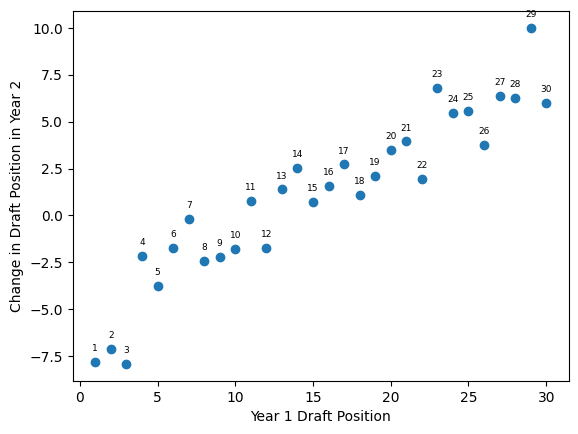

In [9]:
# scatter plot comparing 1st year draft position and change in draft position in year 2
plt.scatter(df_picks_spot["overall_pick"], df_picks_spot["diff"])
plt.xlabel("Year 1 Draft Position")
plt.ylabel("Change in Draft Position in Year 2")

for i in range(len(df_picks_spot)):
    plt.annotate(df_picks_spot['overall_pick'][i], (df_picks_spot['overall_pick'][i], df_picks_spot['diff'][i]), 
                 xytext=(0, 8), textcoords='offset points', ha='center', fontsize = 6.5)


In [10]:
## Part 2) 2a Creating a method for valuing draft position

# filling DNP players with 0s for relevant columns
df["average_minutes_played"] = df["average_minutes_played"].fillna(0)
df["points_per_game"] = df["points_per_game"].fillna(0)
df["average_total_rebounds"] = df["average_total_rebounds"].fillna(0)
df["average_assists"] = df["average_assists"].fillna(0)
df["win_shares"] = df["win_shares"].fillna(0)

Text(0.5, 1.0, 'Avg(PPG) vs. Draft Position')

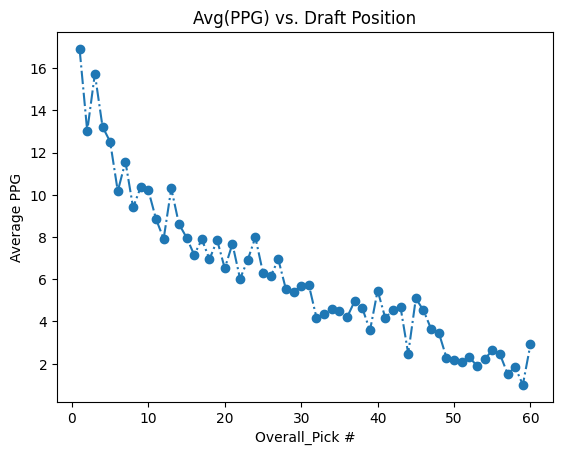

In [11]:
# relationship between player draft position and avg(ppg) for players drafted in that specific position
group_ppg = df.groupby("overall_pick")["points_per_game"].mean()
group_ppg.head(10)

plt.plot(group_ppg.index, group_ppg.values, marker = "o", linestyle = "-.")
plt.xlabel("Overall_Pick #")
plt.ylabel("Average PPG")
plt.title("Avg(PPG) vs. Draft Position")

Text(0.5, 1.0, 'Avg(Rebounds/Game) vs. Draft Position')

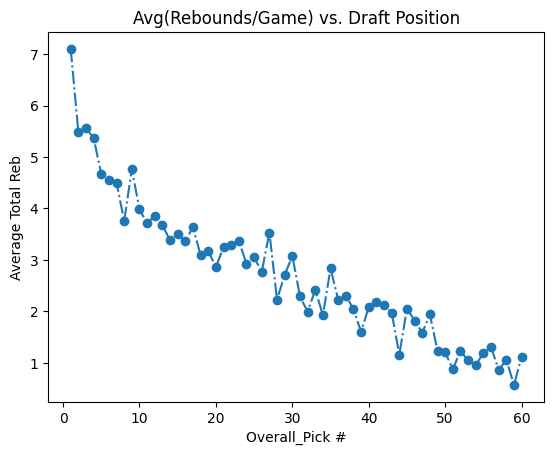

In [12]:
# relationship between player draft position and avg(rebounds) for players drafted in that specific position
group_avg_reb = df.groupby("overall_pick")["average_total_rebounds"].mean()

plt.plot(group_avg_reb.index, group_avg_reb.values, marker = "o", linestyle = "-.")
plt.xlabel("Overall_Pick #")
plt.ylabel("Average Total Reb")
plt.title("Avg(Rebounds/Game) vs. Draft Position")

Text(0.5, 1.0, 'Avg(Assists/Game) vs. Draft Position')

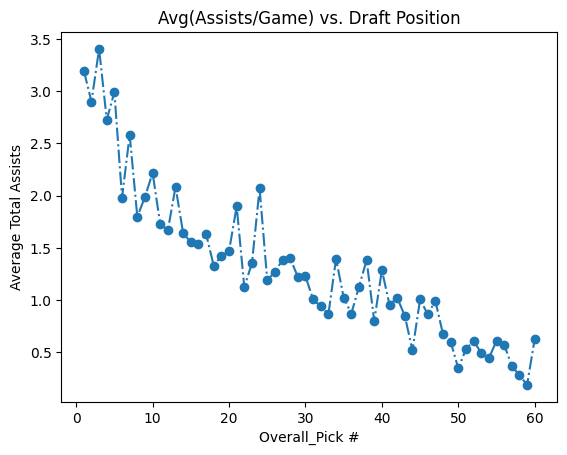

In [13]:
# relationship between player draft position and avg(assists) for players drafted in that specific position
group_avg_assist = df.groupby("overall_pick")["average_assists"].mean()

plt.plot(group_avg_assist.index, group_avg_assist.values, marker = "o", linestyle = "-.")
plt.xlabel("Overall_Pick #")
plt.ylabel("Average Total Assists")
plt.title("Avg(Assists/Game) vs. Draft Position")

Text(0.5, 1.0, 'Avg(Career Win Shares) vs. Draft Position')

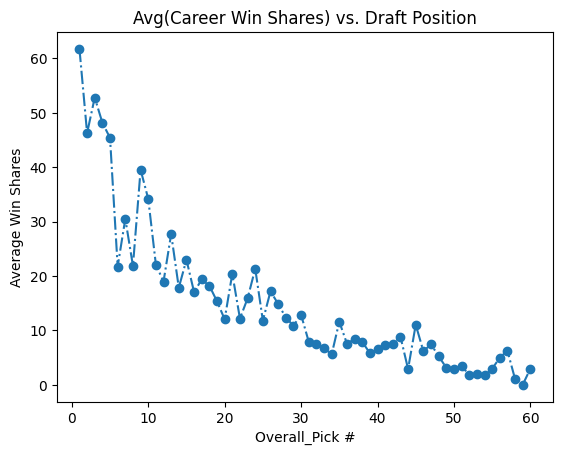

In [14]:
# relationship between player draft position and total win shares for players drafted in that specific position
group_ws = df.groupby("overall_pick")["win_shares"].mean()

plt.plot(group_ws.index, group_ws.values, marker = "o", linestyle = "-.")
plt.xlabel("Overall_Pick #")
plt.ylabel("Average Win Shares")
plt.title("Avg(Career Win Shares) vs. Draft Position")

Text(0.5, 1.0, 'Avg(WS/Game) vs. Draft Position')

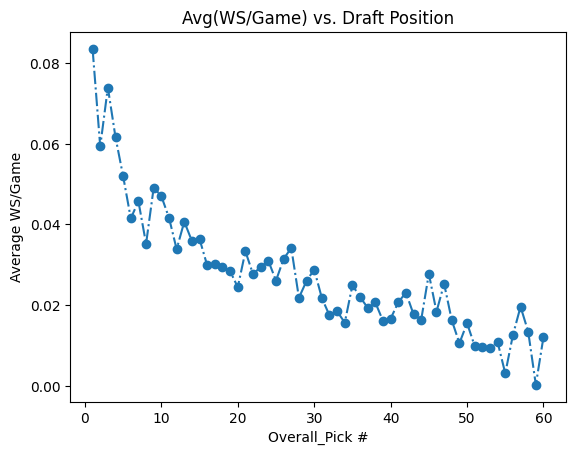

In [15]:
# relationship between player draft position and win shares/game for players drafted in that specific position
df['ws_game'] = df['win_shares']/df["games"]
# df.to_csv("finaldata_metric.csv", index = False)

group_ws_game = df.groupby("overall_pick")["ws_game"].mean()

plt.plot(group_ws_game.index, group_ws_game.values, marker = "o", linestyle = "-.")
plt.xlabel("Overall_Pick #")
plt.ylabel("Average WS/Game")
plt.title("Avg(WS/Game) vs. Draft Position")

Text(0.5, 1.0, 'Avg(VORP) vs. Draft Position')

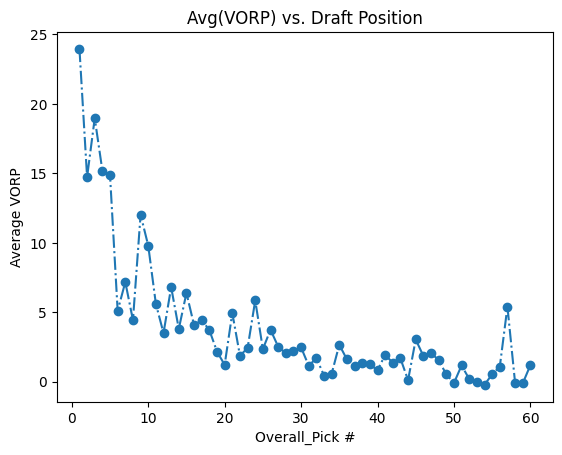

In [16]:
# relationship between player draft position and avg(vorp) for players drafted in that specific position
group_vorp = df.groupby("overall_pick")["value_over_replacement"].mean()

plt.plot(group_vorp.index, group_vorp.values, marker = "o", linestyle = "-.")
plt.xlabel("Overall_Pick #")
plt.ylabel("Average VORP")
plt.title("Avg(VORP) vs. Draft Position")

In [17]:
# Creating new metric for pick evaluation

df['metric'] = df['points_per_game'] + df['average_total_rebounds'] + df['average_assists'] + df['ws_game']
df["metric"] = df["metric"].fillna(0)

# df.to_csv("finaldata2.csv", index = False)

overall_pick
1    27.30
2    21.46
3    24.76
4    21.39
5    20.22
Name: metric, dtype: float64

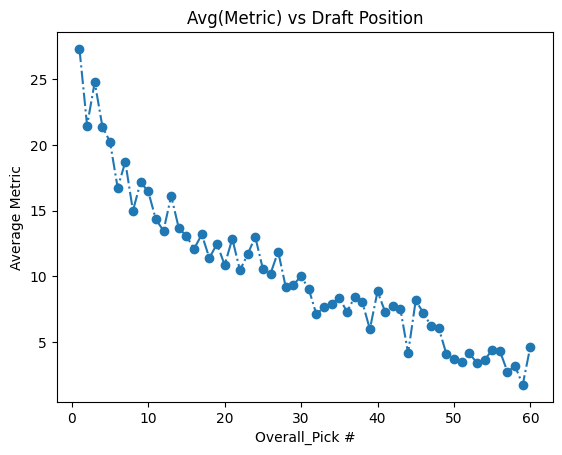

In [18]:
# relationship between player draft position and avg(metric) for players drafted in that specific position
group_metric = df.groupby("overall_pick")["metric"].mean()

plt.plot(group_metric.index, group_metric.values, marker = "o", linestyle = "-.")
plt.xlabel("Overall_Pick #")
plt.ylabel("Average Metric")
plt.title("Avg(Metric) vs Draft Position")

round(group_metric, 2).head(5)

In [19]:
# weight of metric compared to sum of all pick metrics; pick weight/performance
weighted_metric = group_metric.div(group_metric.sum()) * 100


# normalizing pick values to scale of 0-100; creating df
normalized_pick_values = [round(x / max(weighted_metric), 2) for x in weighted_metric * 100]
df_normalized_pick_values = pd.DataFrame(normalized_pick_values, columns = ["pick_values"], 
                                         index = range(1, len(normalized_pick_values) + 1))

# grouping avg pick metric and normalized pick values
df_weighted_metric = weighted_metric.to_frame()
df_group_metric = group_metric.to_frame()

df_values_normalized = pd.merge(df_group_metric, df_weighted_metric, on = "overall_pick",
                               suffixes = ("", "_weighted"))
df_values_normalized = pd.merge(df_values_normalized, df_normalized_pick_values, left_index = True, right_index = True)
round(df_values_normalized, 2).head(10)

,metric,metric_weighted,pick_values
overall_pick,,,
1,27.30,4.43,100.00
2,21.46,3.48,78.63
3,24.76,4.02,90.72
4,21.39,3.47,78.36
5,20.22,3.28,74.06
6,16.74,2.72,61.32
7,18.70,3.04,68.50
8,14.98,2.43,54.89
9,17.16,2.79,62.88


Text(0, 0.5, 'Frequency')

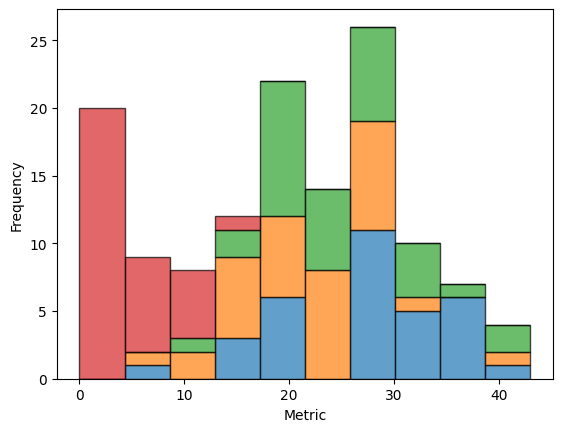

In [20]:
# Using mean: value picks closer to lottery. Those picks are less skewed than later picks 

pick1 = df[df["overall_pick"] == 1]["metric"]
pick2 = df[df["overall_pick"] == 2]["metric"]
pick3 = df[df["overall_pick"] == 3]["metric"]
pick15 = df[df["overall_pick"] == 15]["metric"]
pick30 = df[df["overall_pick"] == 30]["metric"]
pick60 = df[df["overall_pick"] == 50]["metric"]

plt.hist([pick1, pick2, pick3, pick60], bins=10, stacked=True, edgecolor='black', alpha=0.7)
plt.xlabel("Metric")
plt.ylabel("Frequency")

In [21]:
## Part 2) 2b Team draft performance

# NBA teams over/underperformance on drafting
# Comparing drafted player stats compared to average pick performance metric
baseline_metric_df = df.merge(group_metric, left_on = "overall_pick", right_index = True)
baseline_metric_df["comparison_metric"] = baseline_metric_df["metric_x"] - baseline_metric_df["metric_y"]
baseline_metric_df

# baseline_metric_df["std_dev"] = baseline_metric_df["comparison_metric"] / baseline_metric_df["comparison_metric"].std()
# baseline_metric_df[baseline_metric_df["player"] == "LeBron James"]

# baseline_metric_df.to_csv("comparison.csv", index = False)

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,ws_game,metric_x,metric_y,comparison_metric
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,6.7,1.5,21.8,0.090,-0.5,4.4,0.045992,17.745992,27.295671,-9.549680
54,55,1990,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,...,9.3,2.5,64.3,0.119,1.4,22.3,0.082330,28.382330,27.295671,1.086659
108,109,1991,1,1,CHO,Larry Johnson,UNLV,10.0,707.0,25685.0,...,7.5,3.3,69.7,0.130,1.4,22.0,0.098586,27.098586,27.295671,-0.197086
162,163,1992,1,1,ORL,Shaquille O'Neal,LSU,19.0,1207.0,41918.0,...,10.9,2.5,181.7,0.208,5.1,75.5,0.150539,37.250539,27.295671,9.954867
216,217,1993,1,1,ORL,Chris Webber,Michigan,15.0,831.0,30847.0,...,9.8,4.2,84.7,0.132,3.4,42.1,0.101925,34.801925,27.295671,7.506254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,1682,2017,60,60,ATL,Alpha Kaba,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,4.665933,-4.665933
1741,1742,2018,60,60,PHI,Kostas Antetokounmpo,Dayton,3.0,22.0,87.0,...,1.0,0.1,-0.2,-0.098,-9.9,-0.2,-0.009091,2.090909,4.665933,-2.575024
1801,1802,2019,60,60,SAC,Vanja Marinković,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,4.665933,-4.665933
1861,1862,2020,60,60,NOP,Sam Merrill,Utah State University,2.0,36.0,291.0,...,1.0,0.7,0.5,0.088,-1.9,0.0,0.013889,4.913889,4.665933,0.247956


In [22]:
# NBA teams and their draft picks which have over/underperformed given their draft positions

grouped_baseline_metric_df = baseline_metric_df.groupby("team")["comparison_metric"].sum().reset_index()

grouped_baseline_metric_df["std_dev"] = grouped_baseline_metric_df["comparison_metric"] / grouped_baseline_metric_df["comparison_metric"].std()
grouped_baseline_metric_df.sort_values('comparison_metric', ascending = False)

,team,comparison_metric,std_dev
16,MIL,81.099288,1.837625
13,LAL,79.432666,1.799861
26,SAS,69.992890,1.585966
25,SAC,39.968187,0.905637
8,DET,37.892384,0.858602
20,OKC,35.909517,0.813672
9,GSW,34.378751,0.778987
11,IND,30.908474,0.700354
5,CLE,26.907066,0.609686
7,DEN,26.096700,0.591324


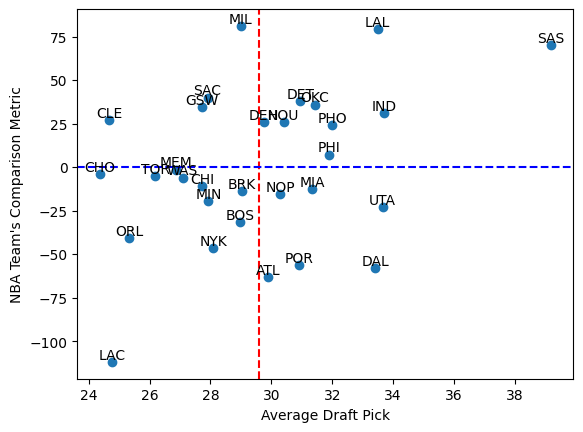

In [23]:
# plotting avg draft pick spot vs comparison metric

nba_team_avg_pick = baseline_metric_df.groupby("team")["overall_pick"].mean().reset_index()
a = pd.merge(grouped_baseline_metric_df, nba_team_avg_pick)

plt.scatter(a["overall_pick"], a["comparison_metric"])
plt.xlabel("Average Draft Pick")
plt.ylabel("NBA Team's Comparison Metric")

# putting in labels
for i in range(len(a)):
    plt.text(a["overall_pick"][i], a["comparison_metric"][i], a["team"][i], ha = "center", va = "bottom")

    
plt.axvline(np.mean(a["overall_pick"]), color= "r", linestyle= "--", label="Average Overall Pick")
plt.axhline(np.mean(a["comparison_metric"]), color= "b", linestyle= "--", label="Average Comparison")


In [24]:
# college teams and their draft pick which have over/underperformed given their draft positions

grouped_college_baseline_metric_df = baseline_metric_df.groupby("college")["comparison_metric"].sum().reset_index()
grouped_college_baseline_metric_df.sort_values("comparison_metric", ascending = False)

# grouped_college_baseline_metric_df.to_csv("college_comparison.csv", index = False)

,college,comparison_metric
85,Kentucky,202.110890
192,UCLA,72.255055
217,Villanova,60.016707
221,Wake Forest,53.882733
105,Michigan,42.261630
...,...,...
75,Indiana,-33.128273
9,BYU,-35.243103
83,Kansas,-42.502585
198,UNLV,-43.669336


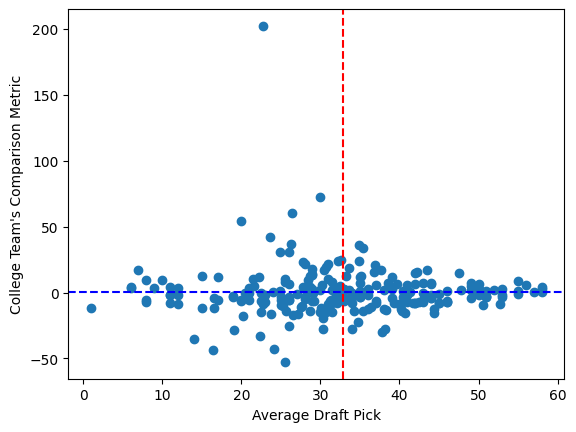

In [25]:
# chart showing where players from colleges get picked and their comparison to expected metric levels

college_team_avg_pick = baseline_metric_df.groupby("college")["overall_pick"].mean().reset_index()

b = pd.merge(grouped_college_baseline_metric_df, college_team_avg_pick)

plt.scatter(b["overall_pick"], b["comparison_metric"])
plt.xlabel("Average Draft Pick")
plt.ylabel("College Team's Comparison Metric")

# putting in labels
# for i in range(len(b)):
#     plt.text(b["overall_pick"][i], b["comparison"][i], b["college"][i], ha = "center", va = "bottom")
    
plt.axvline(np.mean(b["overall_pick"]), color= "r", linestyle= "--", label="Average Overall Pick")
plt.axhline(np.mean(b["comparison_metric"]), color= "b", linestyle= "--", label="Average Comparison")